# Carvago - Data Exploration

In [ ]:
#functions
def create_share_df(
    df, col, color="blue", min_threshold=None, color_other=None,
    list_colours=None):
    counts = df[col].value_counts()
    df_counts = pd.DataFrame()
    df_counts["counts"] = counts
    df_counts["share"] = df_counts["counts"] / df.shape[0]
    colour_list = [color for col in df_counts.index]
    if min_threshold is not None:
        df_counts.reset_index(inplace=True)
        other_val = "other_" + col
        df_counts.loc[df_counts["counts"] < min_threshold, col] = other_val
        df_counts = (df_counts.groupby(col)[["counts", "share"]]
                    .sum()
                    .sort_values(ascending=False, by="share"))
        colour_list = [color_other if col ==other_val else color for col in df_counts.index]
    if list_colours is not None:
        colour_list = list_colours
    df_counts["colours"] = colour_list
    return df_counts

In [152]:
#libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

In [11]:
#read data
data = pd.read_csv("../data/car_data.csv")
data.head()

,id,title,cubic_capacity,power,number_of_seats,fuel_type,transmission,fuel_consumption_combined,carbon_dioxide_emission,drive,...,color,manufacture_date,external_id,price,model,features_all,brand,seller_type,seller_country,seller_rating
0,54408847,Mitsubishi Space Star 52 kW,1193.0,52.0,5.0,Petrol,Manual,4.5,104.0,4x2,...,White,2022-12-01,mobile_de-357402368,361990,Space Star,"['MP3 interface', 'Power assisted steering', '...",Mitsubishi,Dealership,Germany,4.6
1,53378726,Volkswagen Caddy Combi 1.6 TDI BlueMotion Tech...,1598.0,75.0,5.0,Diesel,Automatic,5.2,136.0,4x2,...,White,2014-07-01,autoscout24-71aa69f3-20a5-4028-8333-3bcf112b703f,305490,Caddy,"['Power assisted steering', 'ABS', 'ESP', 'Tra...",Volkswagen,Used cars seller,Belgium,4.5
2,54227793,Volkswagen Polo 1.2 TSI Lounge 66 kW,1197.0,66.0,5.0,Petrol,Manual,4.7,107.0,4x2,...,Brown,2015-10-01,mobile_de-360085596,328990,Polo,"['Sport package', 'Power assisted steering', '...",Volkswagen,Dealership,Germany,4.7
3,54565397,Citroen C5 Tourer HDi 165 FAP Automatic 120 kW,1997.0,120.0,5.0,Diesel,Automatic,6.9,179.0,4x2,...,Blue,2010-12-01,autoscout24-eeef32e4-cff3-4df5-bc51-d1d36575d32e,120490,C5,"['MP3 interface', 'Sport package', 'Power assi...",Citroën,Used cars seller,Germany,5.0
4,53497768,Ford EcoSport 1.0 92 kW,1000.0,92.0,5.0,Petrol,Manual,6.0,134.0,4x2,...,Grey,2017-10-01,mobile_de-358352862,401490,EcoSport,"['MP3 interface', 'Power assisted steering', '...",Ford,Dealership,Germany,4.9


## Data Types

In [12]:
#types of variables
print("number of attributes: " + str(len(data.columns)))
data_types = data.dtypes.to_frame()
data_types.columns = ["data_type"]
print(data_types)
#counts of different types of variables
data_types_counts = data_types.value_counts()
print("Type Counts: ")
print(data_types_counts)

number of attributes: 29
                          data_type
id                            int64
title                        object
cubic_capacity              float64
power                       float64
number_of_seats             float64
fuel_type                    object
transmission                 object
fuel_consumption_combined   float64
carbon_dioxide_emission     float64
drive                        object
car_style                    object
emission_class               object
equipment_version            object
door_count                   object
model_edition                object
created_at                   object
registration_date            object
mileage                       int64
number_of_owners            float64
color                        object
manufacture_date             object
external_id                  object
price                         int64
model                        object
features_all                 object
brand                        object
sel

In the data set there are available 29 different attributes for the analysis. We have info on car brand and model, technical attributes (power, cubic_capacity, ...), mileage of the vehicle, its fuel consumption, month of the manufacturing and registration and other attributes. We can see that 10 of the variables have numeric values, some of the remaining variables can be transformed into nuemrical variables because they have either only two categories (transmission) but still there seems to be a lot of categorical variables. 

## Missing values

In [13]:
data.shape[1]
n_NA = data.isna().sum().to_frame()
n_NA.columns = ["NA_count"]
n_NA['(%)'] = (n_NA['NA_count']/ data.shape[0]) * 100
n_NA

,NA_count,(%)
id,0,0.000000
title,0,0.000000
cubic_capacity,29567,4.394450
power,1,0.000149
number_of_seats,36982,5.496518
fuel_type,0,0.000000
transmission,0,0.000000
fuel_consumption_combined,20992,3.119975
carbon_dioxide_emission,58,0.008620
drive,0,0.000000


## Categorical Variables 

In [60]:
cat_vars = data_types[data_types["data_type"] == "object"].index
carmaker_min = 5000
5000/ data.shape[0]

0.007431341832806699

### Unique Categories

In [15]:
df_cat_unique_vals = pd.DataFrame()
df_cat_unique_vals["unique_vals"] = data[cat_vars].apply(lambda col: col.unique())
df_cat_unique_vals["n_unique"] = data[cat_vars].apply(lambda col: len(col.unique()))
df_cat_unique_vals


,unique_vals,n_unique
title,"[Mitsubishi Space Star 52 kW, Volkswagen Caddy...",36857
fuel_type,"[Petrol, Diesel, Electric, Hybrid, LPG, CNG, O...",9
transmission,"[Manual, Automatic]",2
drive,"[4x2, 4x4, Front wheel drive]",3
car_style,"[Compact, MPV/VAN, Station Wagon, SUV / offroa...",11
emission_class,"[Euro 6d, Euro 5, Euro 6, No emission class, E...",11
equipment_version,"[nan, Lounge, Executive, Tekna, Line, Easy, TI...",917
door_count,"[4/5 doors, nan, 2/3 doors, 6/7 doors]",4
model_edition,"[1.0, Combi 1.6 TDI BlueMotion Technology Comf...",6275
created_at,"[{'date': '2023-02-24 01:52:06.000000', 'timez...",130827


Looking more closely on the individual values of categorical variables in the data set there is only 1 column with only 2 categories. So for the most of them, in the case we want to use them in a model that does not support categorical variables directly (OLS..) we will be forced to either restrict the data set to only few selected values or transform them into  dummy variables.  

### Variables Distributions

### Car Makers

<Axes: title={'center': 'Brands by their share in the data set'}, xlabel='brand', ylabel='share'>

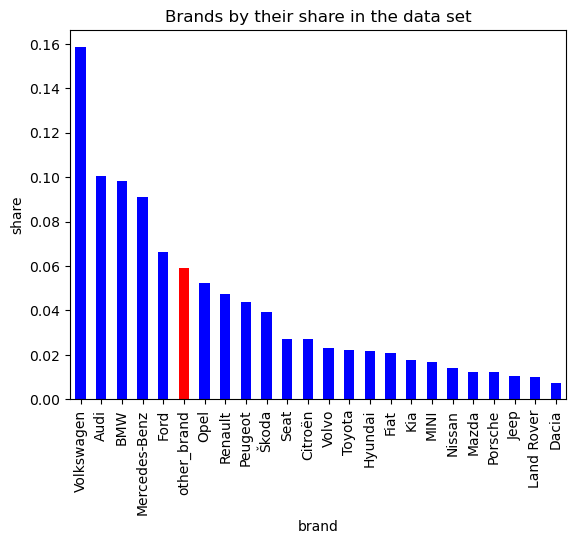

In [87]:
carmakers_df =  create_share_df(df=data, col="brand", min_threshold=carmaker_min, color="blue", color_other="red")
carmakers_df["share"].plot.bar(ylabel="share", title="Brands by their share in the data set", color=carmakers_df["colours"])

Looking at the barplot with shares of individual carmakers, we can see that they are not really proportional. Over 40 % observations in the data set belong to 4 major German carmakers - Volkswagen, Audi, BMW and Mercedes-Benz. There are 18 other car brands with at least 5000 observations (0.007 share in the dataset) and 6 % of the observations belong to other car makers with smaller number of osbervations. 

### Other Categorical Variables

3


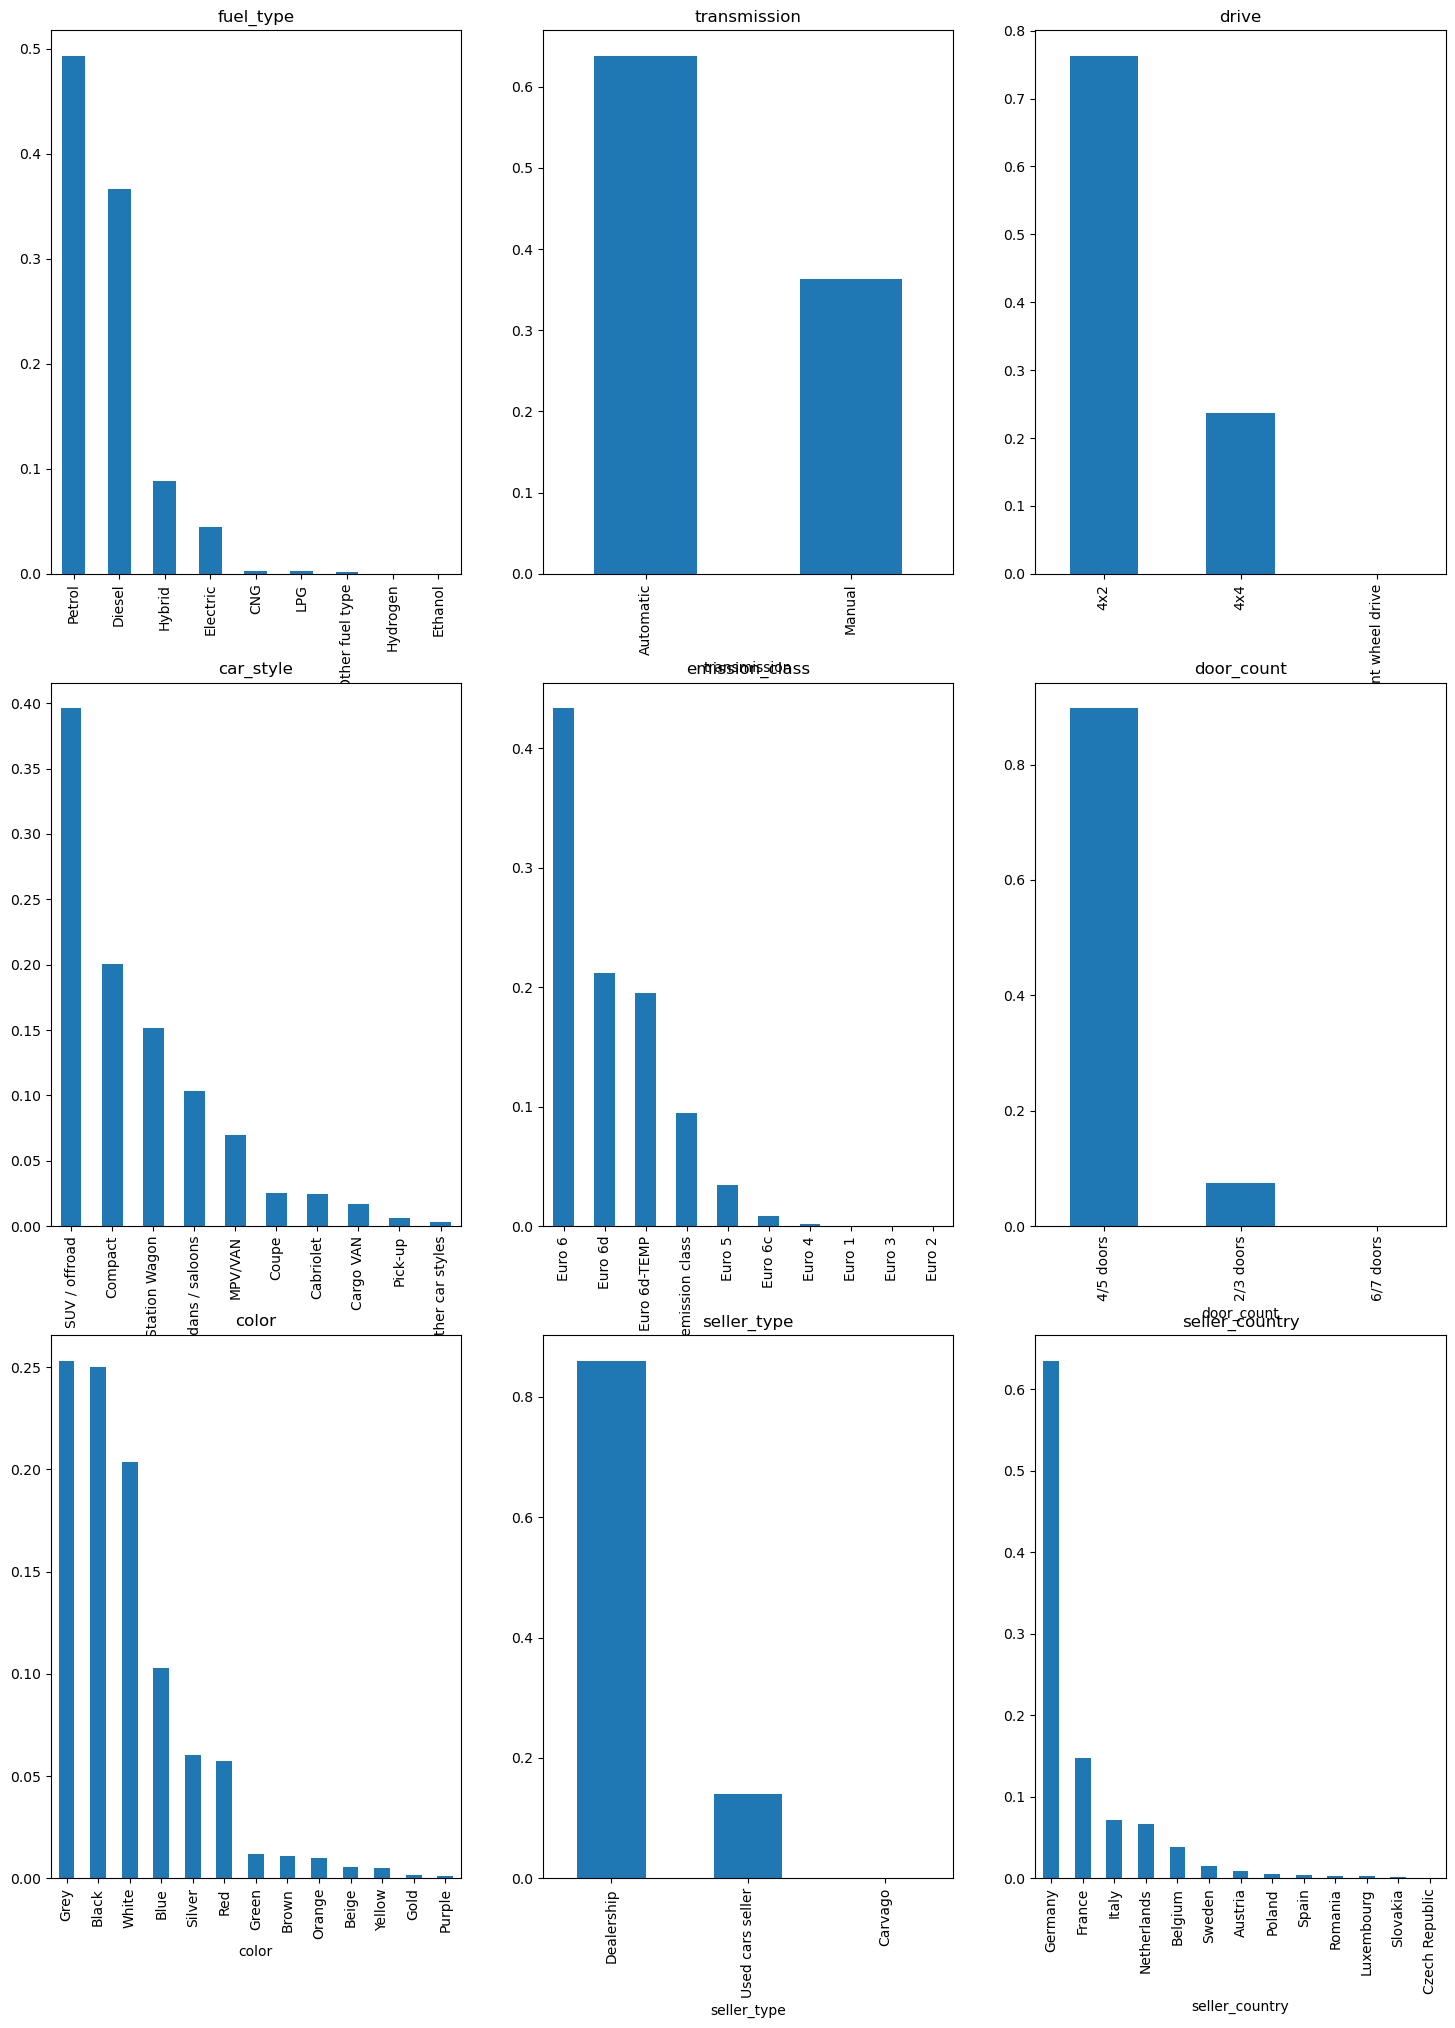

In [120]:
cat_cols_grid = ['fuel_type', 'transmission', 'drive', 'car_style', 'emission_class', 'door_count', 'color', 'seller_type', 'seller_country']

n_rows = math.ceil(len(cat_cols_grid) / 3)
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 24))
row_ind = 0
col_ind = -1
for ind in range(len(cat_cols_grid)):
    row_ind = math.floor(ind / 3)
    col_ind += 1 
    df_share = create_share_df(
    df=data, 
    col=cat_cols_grid[ind]
    )
    df_share["share"].plot.bar(
        ax=axes[row_ind, col_ind], 
        title=cat_cols_grid[ind]
        )
    if col_ind == 2:
        col_ind = -1

### Month of Registration and Month of Manufacture

Text(0.5, 1.0, 'Distribution of Months of Registration')

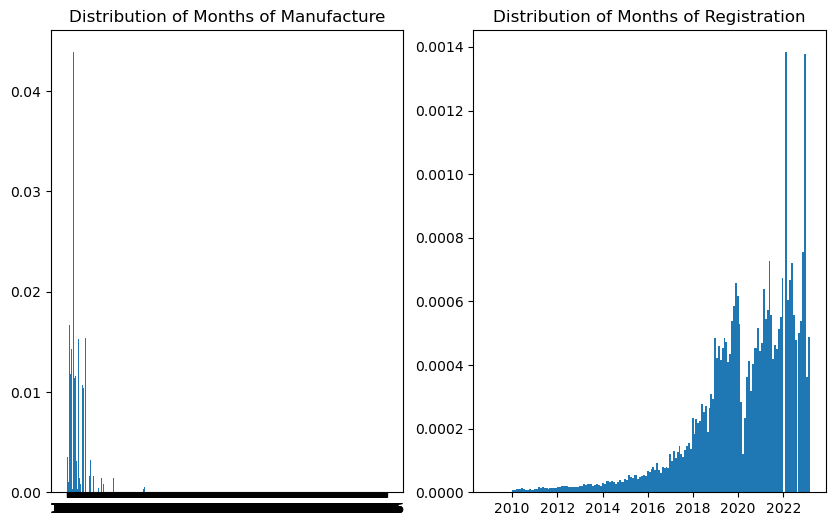

In [185]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
years_fmt = DateFormatter('%Y')
ax[0].hist(data['manufacture_date'], bins=len(data['manufacture_date'].unique()), label='Value', density=True)
ax[0].xaxis.set_major_formatter(years_fmt)
ax[0].set_title("Distribution of Months of Manufacture")

ax[1].hist(data['registration_date'], bins=len(data['registration_date'].unique()), label='Value', density=True)
ax[1].xaxis.set_major_formatter(years_fmt)
ax[1].set_title("Distribution of Months of Registration")

Text(0.5, 1.0, 'Distribution of Months of Registration')

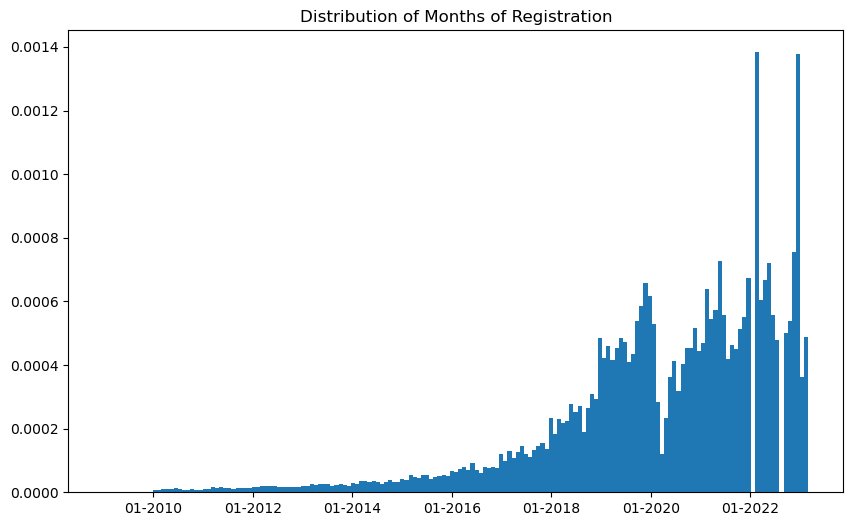

In [164]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.hist(data['registration_date'], bins=len(data['registration_date'].unique()), label='Value', density=True)
years_fmt = DateFormatter('%m-%Y')
ax2.xaxis.set_major_formatter(years_fmt)
ax2.set_title("Distribution of Months of Registration")